# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units="metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = (city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ghat
Processing Record 2 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | taoudenni
Processing Record 6 of Set 1 | kerikeri
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | tsiombe
Processing Record 10 of Set 1 | coquimbo
Processing Record 11 of Set 1 | kizhinga
Processing Record 12 of Set 1 | misratah
Processing Record 13 of Set 1 | laguna
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | nadym
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | anzhero-sudzhensk
Processing Record 19 of Set 1 | gunnedah
Processing Record 20 of Set 1 | pitimbu
Processing Record 21 of Set 1 | ushuaia
Processing Record 22

In [63]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

#Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [65]:
# Display sample data
city_data_df["Date"]=pd.to_datetime(city_data_df["Date"],unit='s', utc=True)

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ghat,24.9647,10.1728,27.17,18,0,1.32,LY,2024-10-25 18:58:54+00:00
1,port-aux-francais,-49.3500,70.2167,2.25,67,48,10.32,TF,2024-10-25 18:53:09+00:00
2,olonkinbyen,70.9221,-8.7187,-1.56,64,100,8.59,SJ,2024-10-25 18:54:10+00:00
3,taoudenni,22.6783,-3.9836,29.20,22,0,3.79,ML,2024-10-25 19:00:03+00:00
4,kerikeri,-35.2268,173.9474,18.28,93,100,4.47,NZ,2024-10-25 19:00:04+00:00


In [67]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [69]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ghat,24.9647,10.1728,27.17,18,0,1.32,LY,2024-10-25 18:58:54+00:00
1,port-aux-francais,-49.3500,70.2167,2.25,67,48,10.32,TF,2024-10-25 18:53:09+00:00
2,olonkinbyen,70.9221,-8.7187,-1.56,64,100,8.59,SJ,2024-10-25 18:54:10+00:00
3,taoudenni,22.6783,-3.9836,29.20,22,0,3.79,ML,2024-10-25 19:00:03+00:00
4,kerikeri,-35.2268,173.9474,18.28,93,100,4.47,NZ,2024-10-25 19:00:04+00:00


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

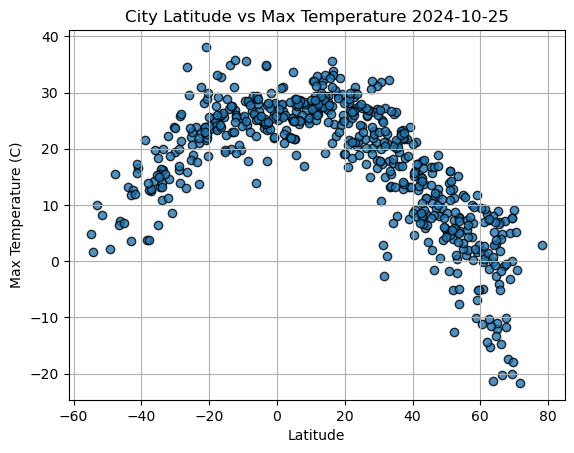

In [74]:

# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

fig1, ax1 = plt.subplots()
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
date_time = datetime.date(datetime.now())
plt.title(f"City Latitude vs Max Temperature {date_time}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

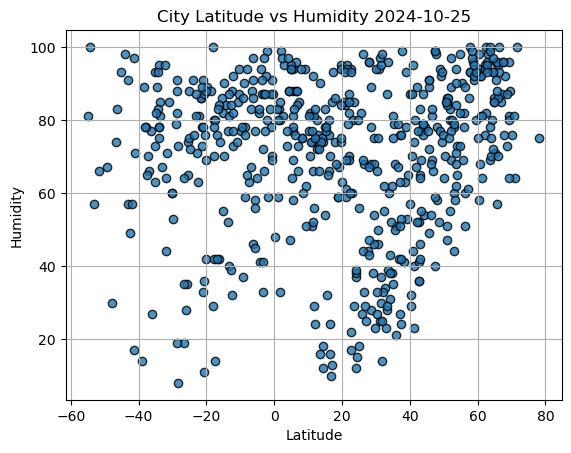

In [80]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
fig1, ax1 = plt.subplots()
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
date_time = datetime.date(datetime.now())
plt.title(f"City Latitude vs Humidity {date_time}")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

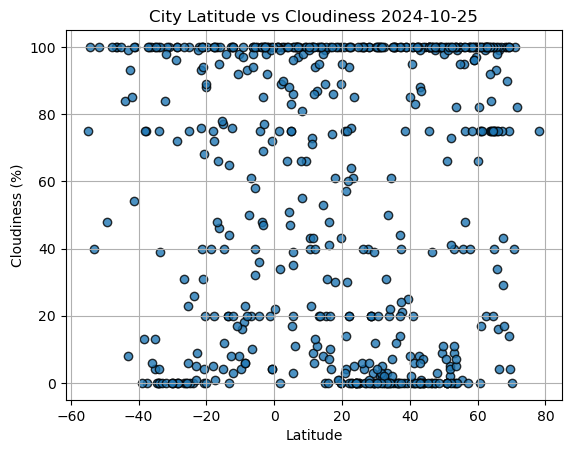

In [83]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
fig1, ax1 = plt.subplots()
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
date_time = datetime.date(datetime.now())
plt.title(f"City Latitude vs Cloudiness {date_time}")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

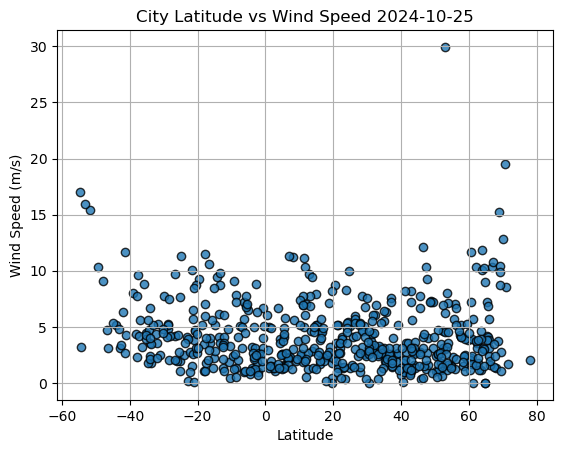

In [85]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
fig1, ax1 = plt.subplots()
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
date_time = datetime.date(datetime.now())
plt.title(f"City Latitude vs Wind Speed {date_time}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [304]:
# Define a function to create Linear Regression plots
from scipy.stats import pearsonr

def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Get regression values
    regress_values = x_values * slope + intercept
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    fig1, ax1 = plt.subplots(figsize=(10,8))
    plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
    plt.xlabel(x_label,fontsize = 14)
    plt.ylabel(y_label,fontsize = 14)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}",fontsize = 15)
    plt.annotate(line_eq,xy=(10, 50),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(-50, 10),fontsize=22,xycoords='data',xytext=(0.4, 0.3), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(10, 25),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    return plt.plot(x_values,regress_values,"r-")

In [306]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ghat,24.9647,10.1728,27.17,18,0,1.32,LY,2024-10-25 18:58:54+00:00
2,olonkinbyen,70.9221,-8.7187,-1.56,64,100,8.59,SJ,2024-10-25 18:54:10+00:00
3,taoudenni,22.6783,-3.9836,29.20,22,0,3.79,ML,2024-10-25 19:00:03+00:00
6,stanley,54.8680,-1.6985,11.82,98,100,1.54,GB,2024-10-25 18:54:40+00:00
9,kizhinga,51.8462,109.9097,-5.07,55,2,1.15,RU,2024-10-25 19:00:10+00:00


In [308]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,2.25,67,48,10.32,TF,2024-10-25 18:53:09+00:00
4,kerikeri,-35.2268,173.9474,18.28,93,100,4.47,NZ,2024-10-25 19:00:04+00:00
5,avarua,-21.2078,-159.7750,23.03,73,40,5.66,CK,2024-10-25 19:00:06+00:00
7,tsiombe,-25.3000,45.4833,22.05,74,6,1.92,MG,2024-10-25 19:00:08+00:00
8,coquimbo,-29.9533,-71.3436,19.43,53,0,7.72,CL,2024-10-25 18:58:43+00:00


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7256465660702014
The correlation between both factors is -0.85


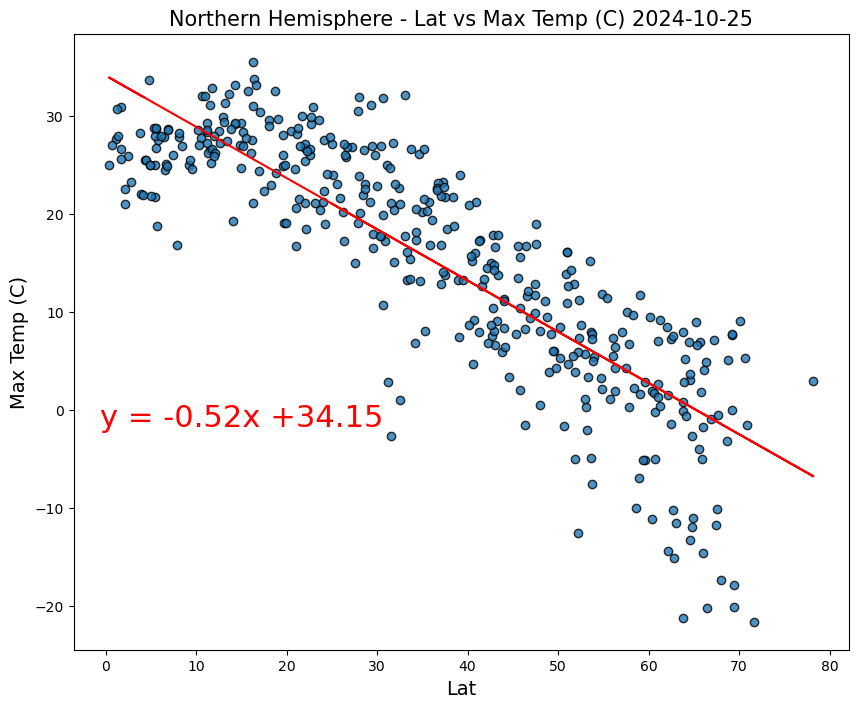

In [311]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (C)", "Northern", )
plt.savefig("output_data/Northern_Hemi_MaxTemp_lat.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.5499383285815667
The correlation between both factors is 0.74


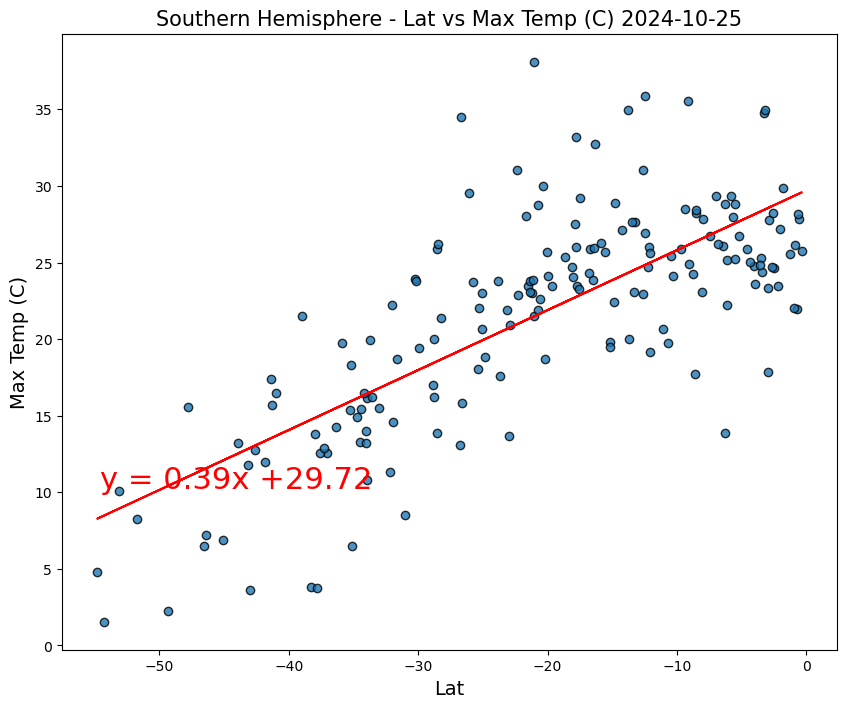

In [313]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (C)", "Southern")
plt.savefig("output_data/Southern_Hemi_MaxTemp_lat.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:**  Both the Northern and Southern Hemisphere randomly selected cities' temperatures were plotted against their latitude. Linear regression was calculated to understand if there is a possible correlation between lat and temperature. The results show a strong correlation between lat and temeprature; the closer to the equator the higher the temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.008984554671949906
The correlation between both factors is 0.09


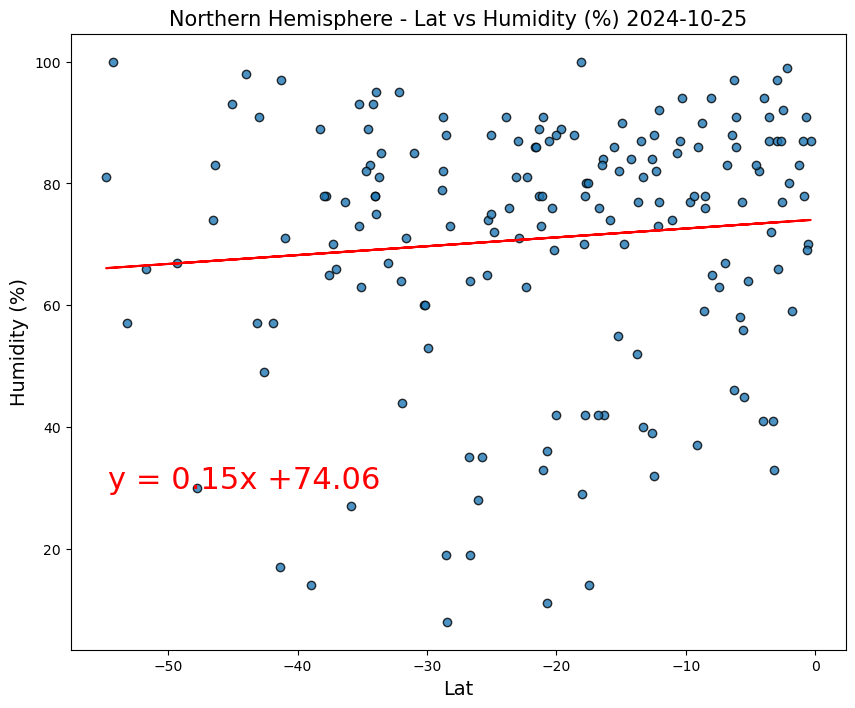

In [315]:
# Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Lat", "Humidity (%)", "Northern")
plt.savefig("output_data/Northern_Hemi_Humidity_lat.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.008984554671949906
The correlation between both factors is 0.09


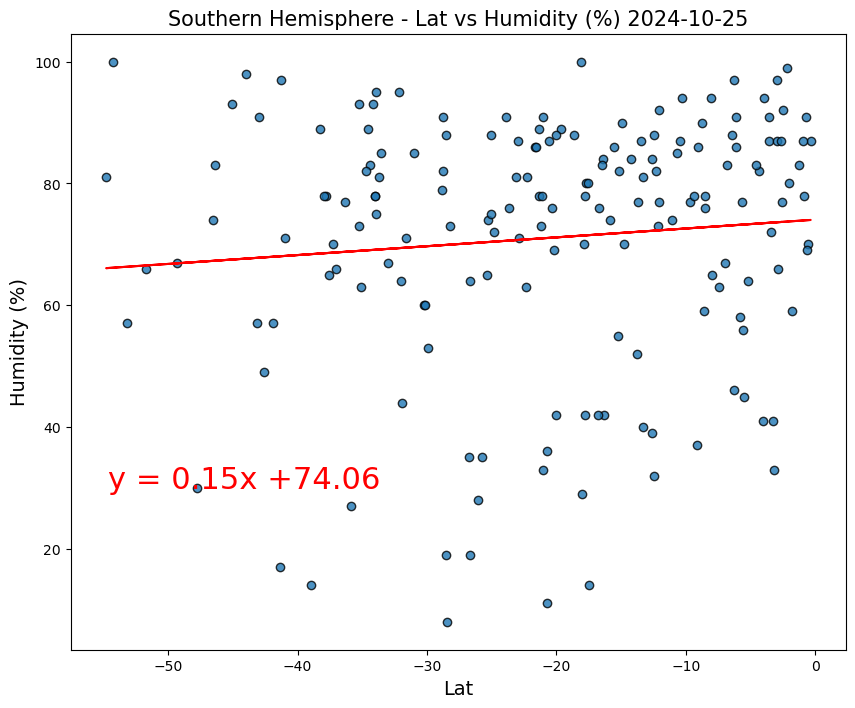

In [289]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Lat", "Humidity (%)", "Southern",(40, 20))
plt.savefig("output_data/Southern_Hemi_Humidity_lat.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** Both the Northern and Southern Hemisphere randomly selected cities' humidity was plotted against their latitude. Linear regression was calculated to understand if there is a possible correlation between lat and humidity. The results show a no correlation between lat and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0036638515917968443
The correlation between both factors is 0.06


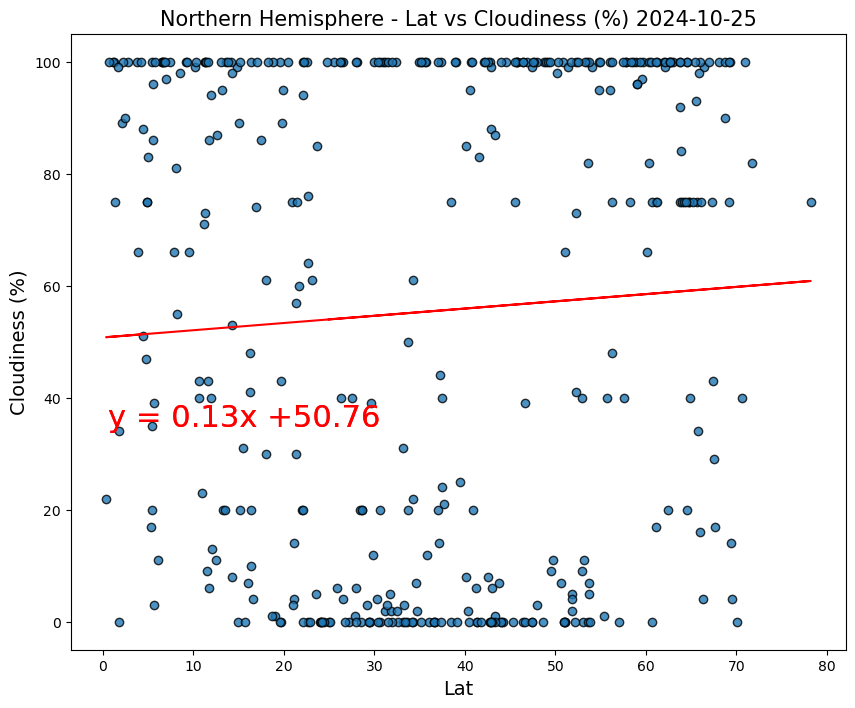

In [317]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Lat", "Cloudiness (%)", "Northern")
plt.savefig("output_data/Northern_Hemi_Cloudiness_lat.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.0010638577972214456
The correlation between both factors is 0.03


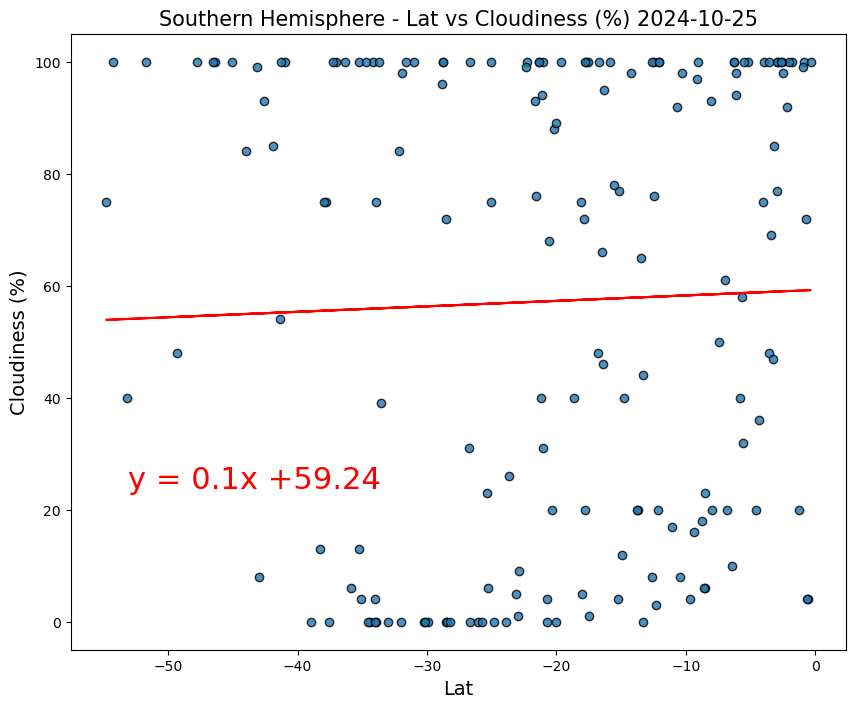

In [319]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Lat", "Cloudiness (%)", "Southern")
plt.savefig("output_data/Southern_Hemi_Cloudiness_lat.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** Both the Northern and Southern Hemisphere randomly selected cities' cloudiness was plotted against their latitude. Linear regression was calculated to understand if there is a possible correlation between lat and cloudiness. The results show a no correlation between lat and humidity. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.010314530619320937
The correlation between both factors is 0.1


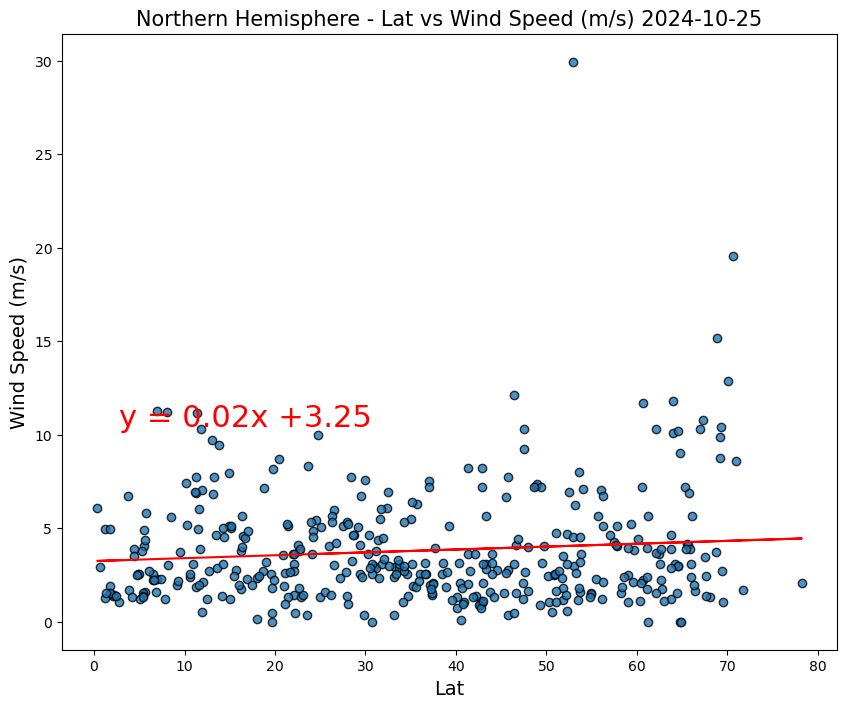

In [321]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Lat", "Wind Speed (m/s)", "Northern" )
plt.savefig("output_data/Northern_Hemi_WindSpeed_lat.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.10084852899023351
The correlation between both factors is -0.32


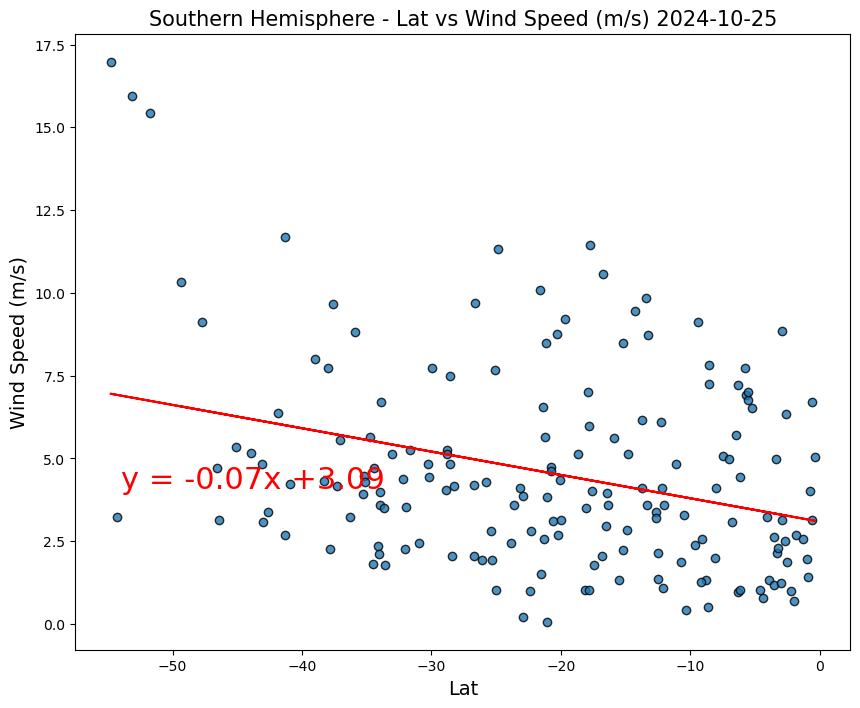

In [323]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Lat", "Wind Speed (m/s)", "Southern" )
plt.savefig("output_data/Southern_Hemi_WindSpeed_lat.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** Both the Northern and Southern Hemisphere randomly selected cities' wind speed was plotted against their latitude. Linear regression was calculated to understand if there is a possible correlation between lat and wind speed. The results show a no correlation between lat and wind speed. 